In [1]:
import scanpy as sc
import singleCellHaystack as hs
import numpy as np

In [2]:
#adata = sc.read_h5ad("/Users/diez/pbmc3k.h5ad")
adata = sc.datasets.pbmc3k_processed()
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [3]:
adata.obs

,n_genes,percent_mito,n_counts,louvain
index,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells
...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells


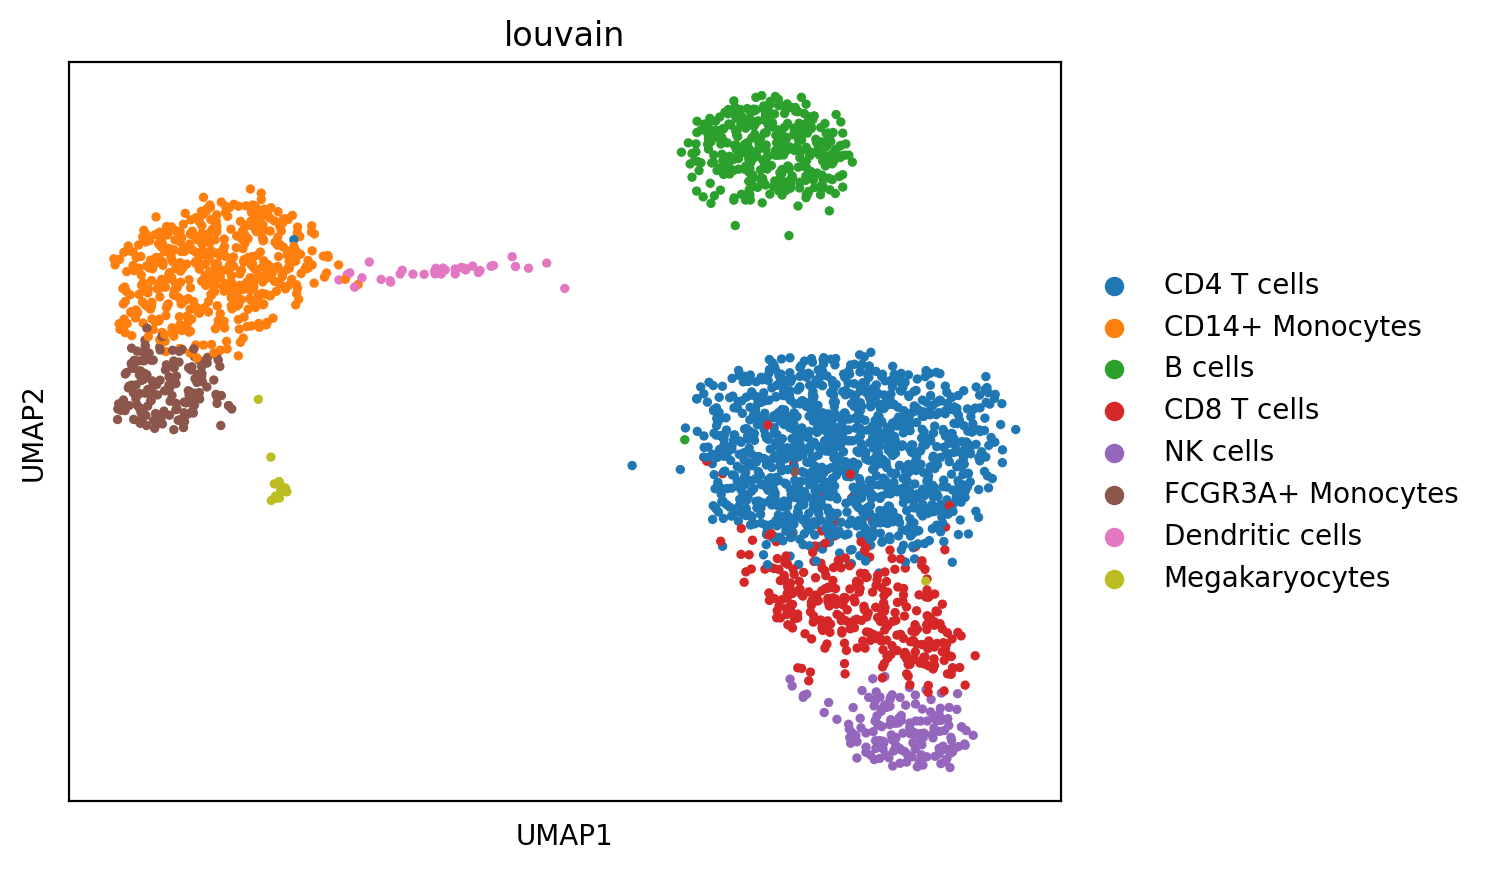

In [4]:
sc.pl.umap(adata, color="louvain")

In [5]:
adata_raw=adata.raw.to_adata()
adata_raw

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    obsp: 'distances', 'connectivities'

In [6]:
res1=hs.haystack(adata_raw, basis="umap")

> starting haystack ...
> scaling coordinates ...
> converting to dense array ...
> calculating feature's stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|████████████████████████████████████████████████████| 13713/13713 [00:08<00:00, 1553.40it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 16.69it/s]


> calculating P values ...
> done.


In [7]:
exprs=adata_raw.X

In [8]:
exprs

<2638x13714 sparse matrix of type '<class 'numpy.float32'>'
	with 2238732 stored elements in Compressed Sparse Row format>

In [9]:
coord=adata_raw.obsm["X_umap"]
coord

array([[ 1.35285574,  2.26612719],
       [-0.47802448,  7.87730423],
       [ 2.16588875, -0.24481226],
       ...,
       [ 0.34670979,  8.34967798],
       [ 0.19864146,  9.56698797],
       [ 2.62803322,  0.36722543]])

In [10]:
res2=hs.haystack_sparse(exprs, coord)

> entering sparse method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|████████████████████████████████████████████████████| 13713/13713 [00:03<00:00, 4212.99it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.15it/s]


> calculating P values ...
> done.


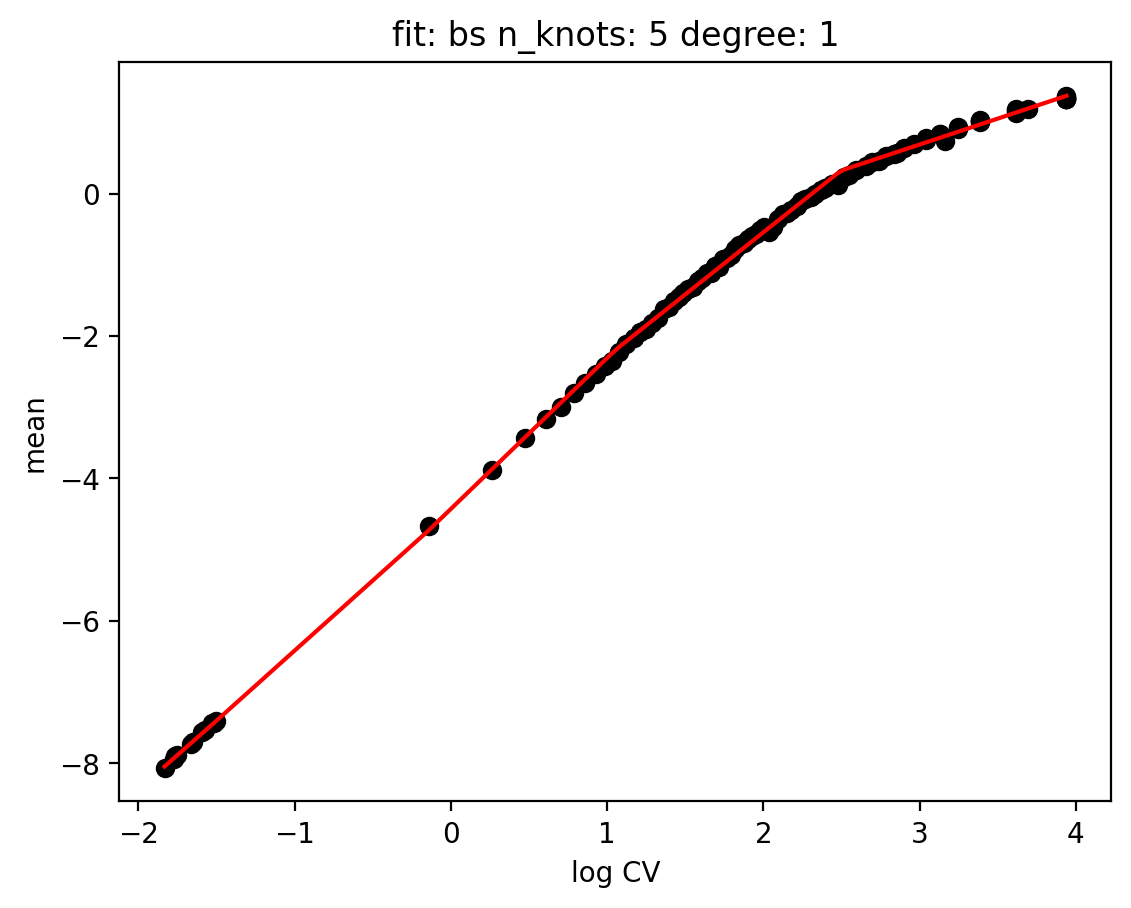

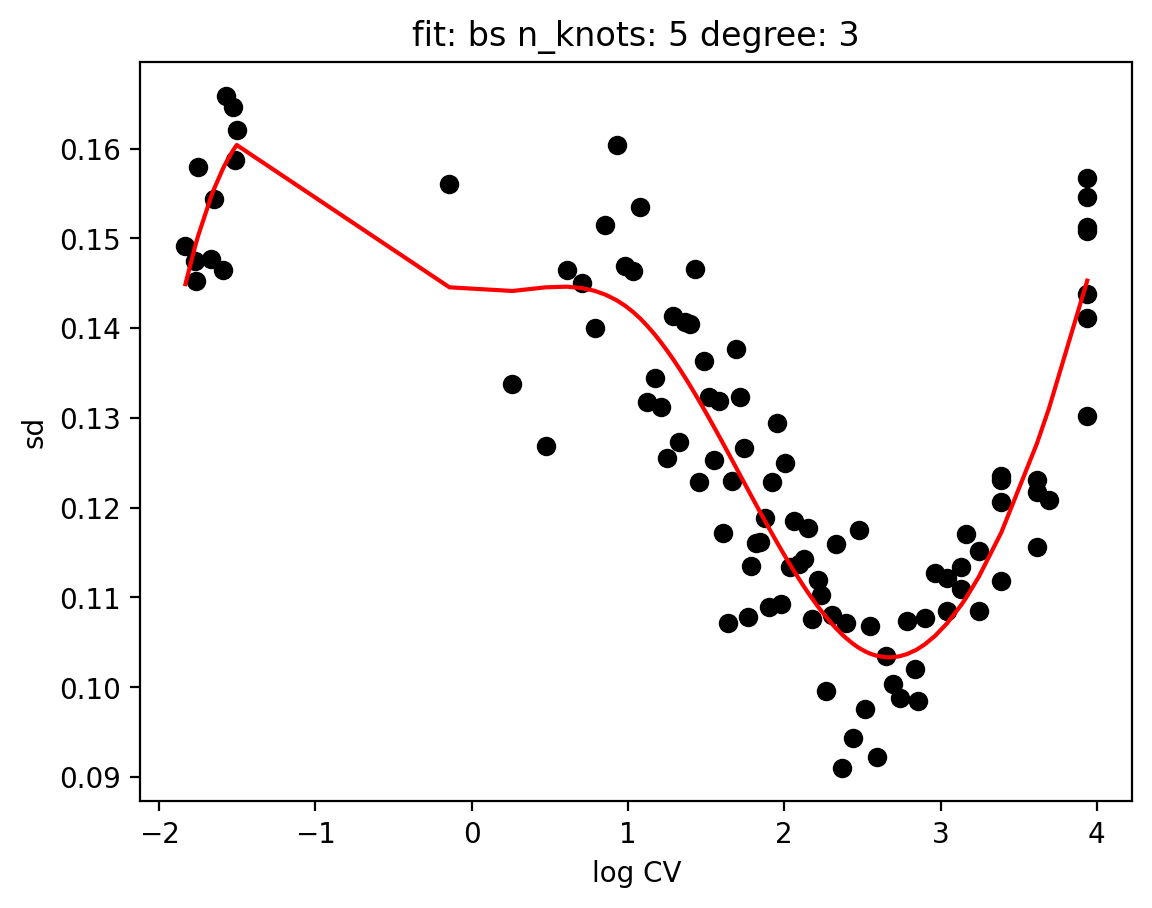

In [11]:
hs.plot_rand_fit(res1, "mean")
hs.plot_rand_fit(res1, "sd")

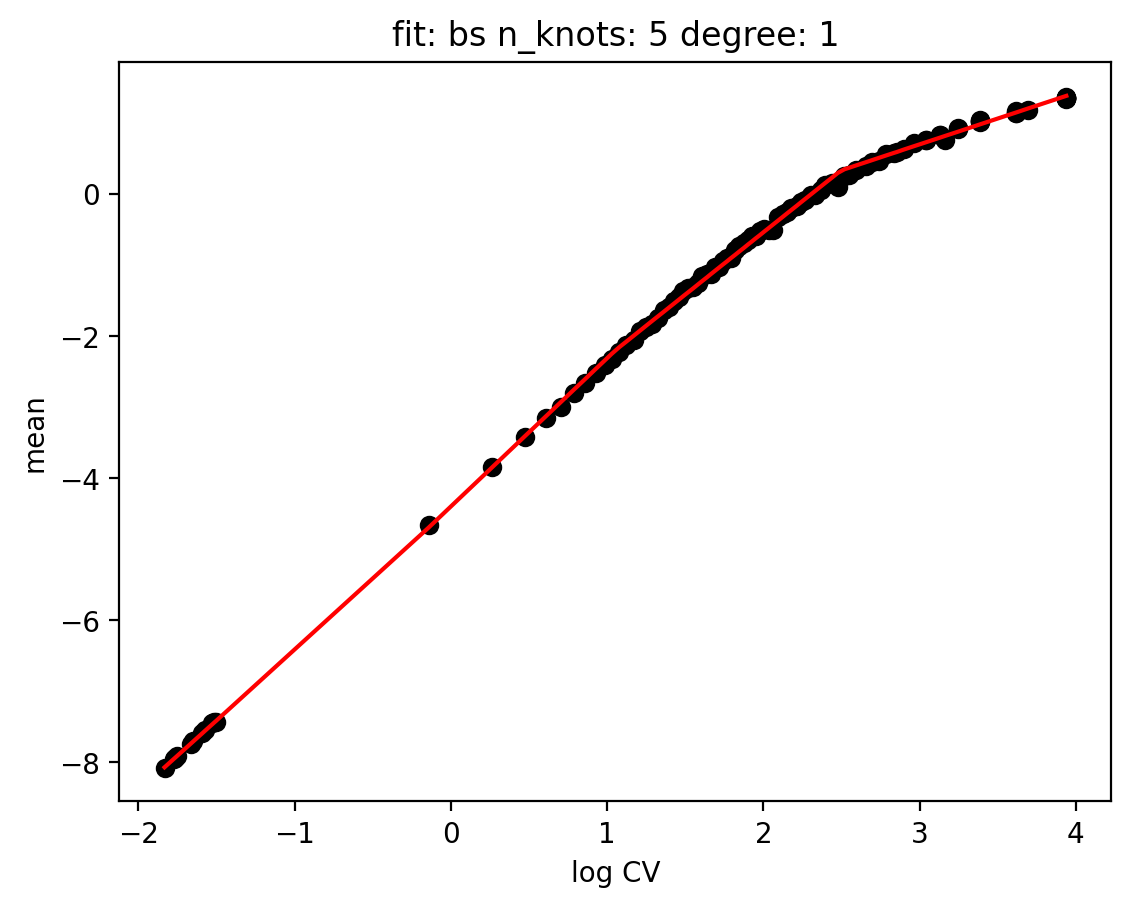

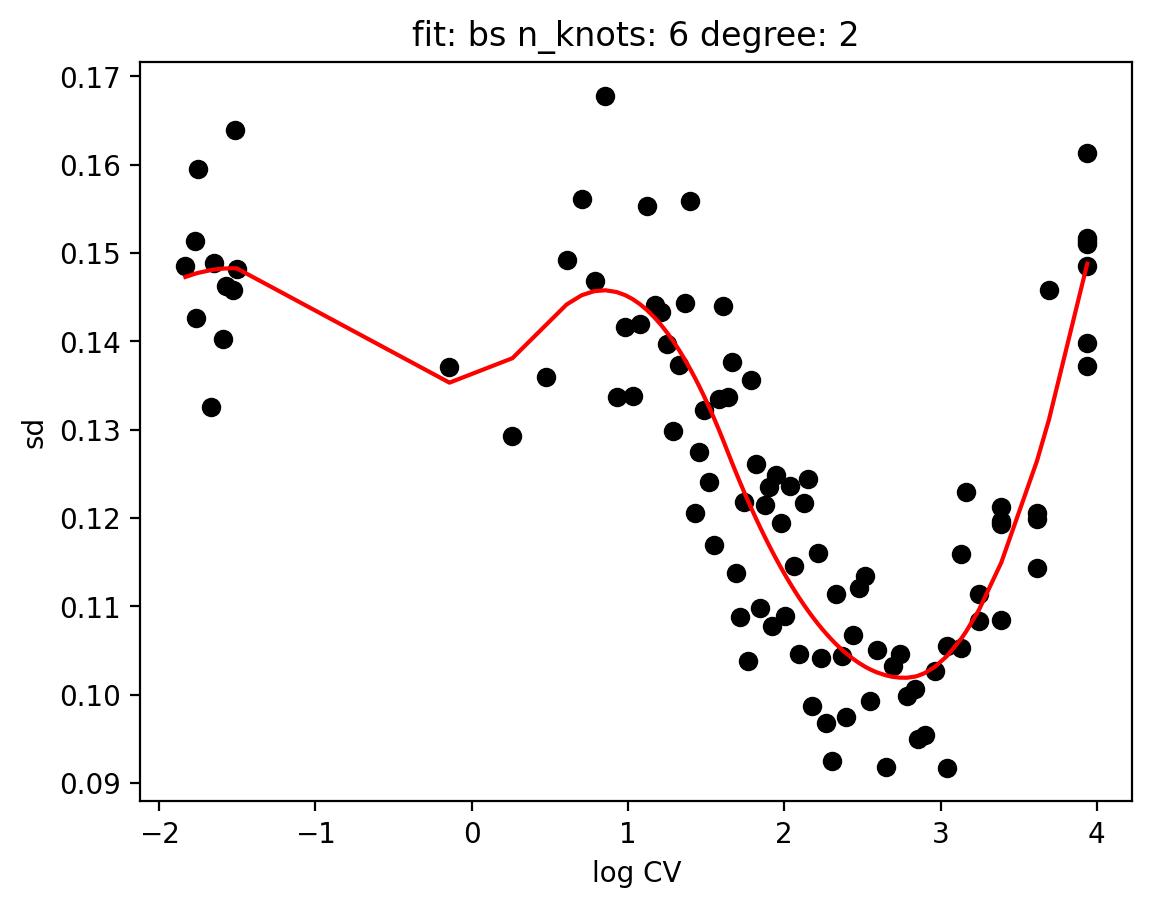

In [12]:
hs.plot_rand_fit(res2, "mean")
hs.plot_rand_fit(res2, "sd")

In [13]:
res1["results"]

,gene,KLD,pval,pval_adj,logpval,logpval_adj
12672,TYROBP,0.837719,1.799242e-130,2.467300e-126,-129.744911,-125.607778
4409,HLA-DRA,0.515296,2.653539e-128,3.638799e-124,-127.576174,-123.439042
4411,HLA-DRB1,0.608563,6.545447e-123,8.975771e-119,-122.184061,-118.046928
11877,CST3,0.831445,6.519774e-122,8.940565e-118,-121.185767,-117.048635
8145,CD3D,0.410624,2.700858e-120,3.703686e-116,-119.568498,-115.431366
...,...,...,...,...,...,...
6218,TMEM67,0.968832,9.999437e-01,1.000000e+00,-0.000024,0.000000
6224,DPY19L4,0.907656,9.999525e-01,1.000000e+00,-0.000021,0.000000
12907,DHX34,0.764778,9.999764e-01,1.000000e+00,-0.000010,0.000000
1344,OBSCN,0.923250,9.999856e-01,1.000000e+00,-0.000006,0.000000


In [14]:
res2["results"]

,KLD,pval,pval_adj,logpval,logpval_adj
12672,0.852922,2.424443e-139,3.324639e-135,-138.615388,-134.478256
4409,0.503368,4.547923e-138,6.236567e-134,-137.342187,-133.205054
912,0.163813,1.165831e-135,1.598704e-131,-134.933364,-130.796232
8145,0.429172,2.398216e-135,3.288674e-131,-134.620112,-130.482979
4025,0.194260,5.336601e-133,7.318081e-129,-132.272735,-128.135603
...,...,...,...,...,...
6224,0.948297,9.998348e-01,1.000000e+00,-0.000072,0.000000
1344,0.985644,9.998784e-01,1.000000e+00,-0.000053,0.000000
7125,0.947665,9.999189e-01,1.000000e+00,-0.000035,0.000000
9512,0.937203,9.999764e-01,1.000000e+00,-0.000010,0.000000


In [15]:
sum1 = res1["results"]
sum1

,gene,KLD,pval,pval_adj,logpval,logpval_adj
12672,TYROBP,0.837719,1.799242e-130,2.467300e-126,-129.744911,-125.607778
4409,HLA-DRA,0.515296,2.653539e-128,3.638799e-124,-127.576174,-123.439042
4411,HLA-DRB1,0.608563,6.545447e-123,8.975771e-119,-122.184061,-118.046928
11877,CST3,0.831445,6.519774e-122,8.940565e-118,-121.185767,-117.048635
8145,CD3D,0.410624,2.700858e-120,3.703686e-116,-119.568498,-115.431366
...,...,...,...,...,...,...
6218,TMEM67,0.968832,9.999437e-01,1.000000e+00,-0.000024,0.000000
6224,DPY19L4,0.907656,9.999525e-01,1.000000e+00,-0.000021,0.000000
12907,DHX34,0.764778,9.999764e-01,1.000000e+00,-0.000010,0.000000
1344,OBSCN,0.923250,9.999856e-01,1.000000e+00,-0.000006,0.000000


In [16]:
sum2 = res2["results"]
sum2

,KLD,pval,pval_adj,logpval,logpval_adj
12672,0.852922,2.424443e-139,3.324639e-135,-138.615388,-134.478256
4409,0.503368,4.547923e-138,6.236567e-134,-137.342187,-133.205054
912,0.163813,1.165831e-135,1.598704e-131,-134.933364,-130.796232
8145,0.429172,2.398216e-135,3.288674e-131,-134.620112,-130.482979
4025,0.194260,5.336601e-133,7.318081e-129,-132.272735,-128.135603
...,...,...,...,...,...
6224,0.948297,9.998348e-01,1.000000e+00,-0.000072,0.000000
1344,0.985644,9.998784e-01,1.000000e+00,-0.000053,0.000000
7125,0.947665,9.999189e-01,1.000000e+00,-0.000035,0.000000
9512,0.937203,9.999764e-01,1.000000e+00,-0.000010,0.000000


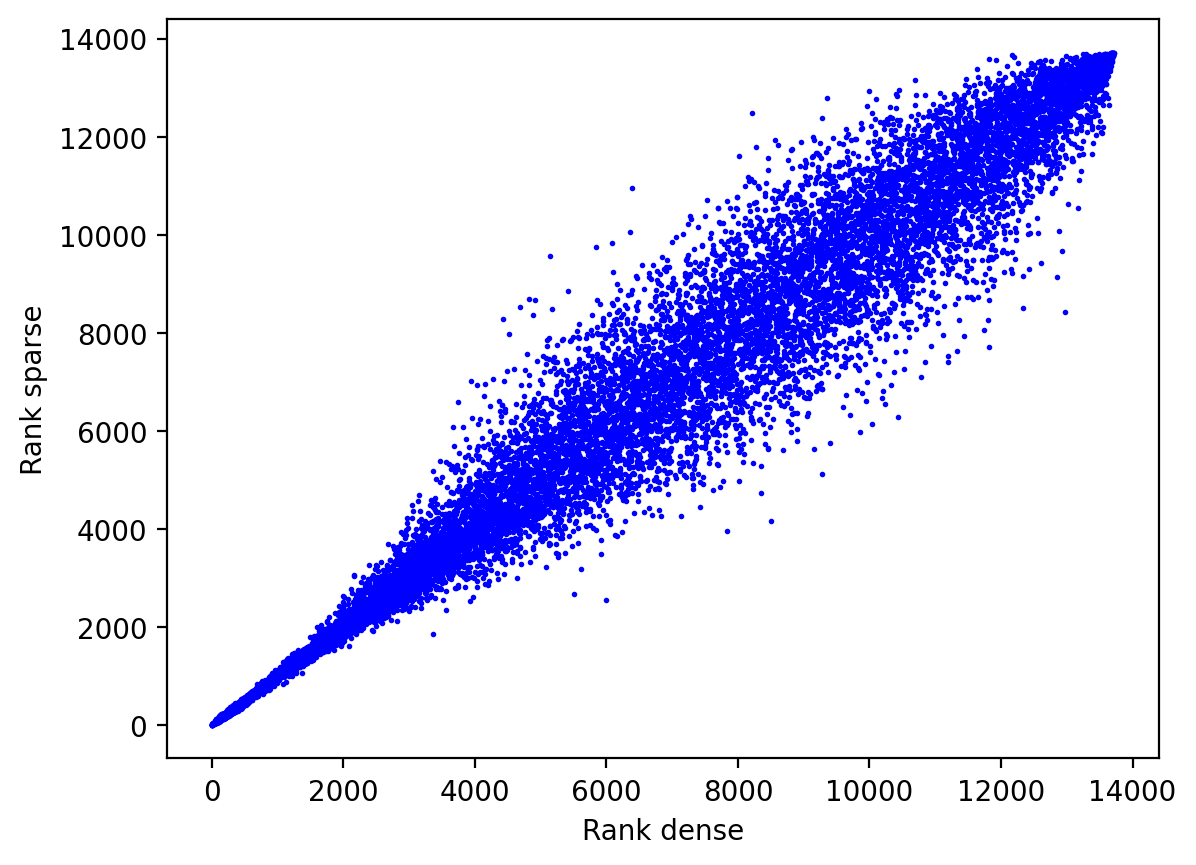

In [17]:
hs.plot_compare_ranks(res1, res2, sort_by="logpval", xlabel="Rank dense", ylabel="Rank sparse")

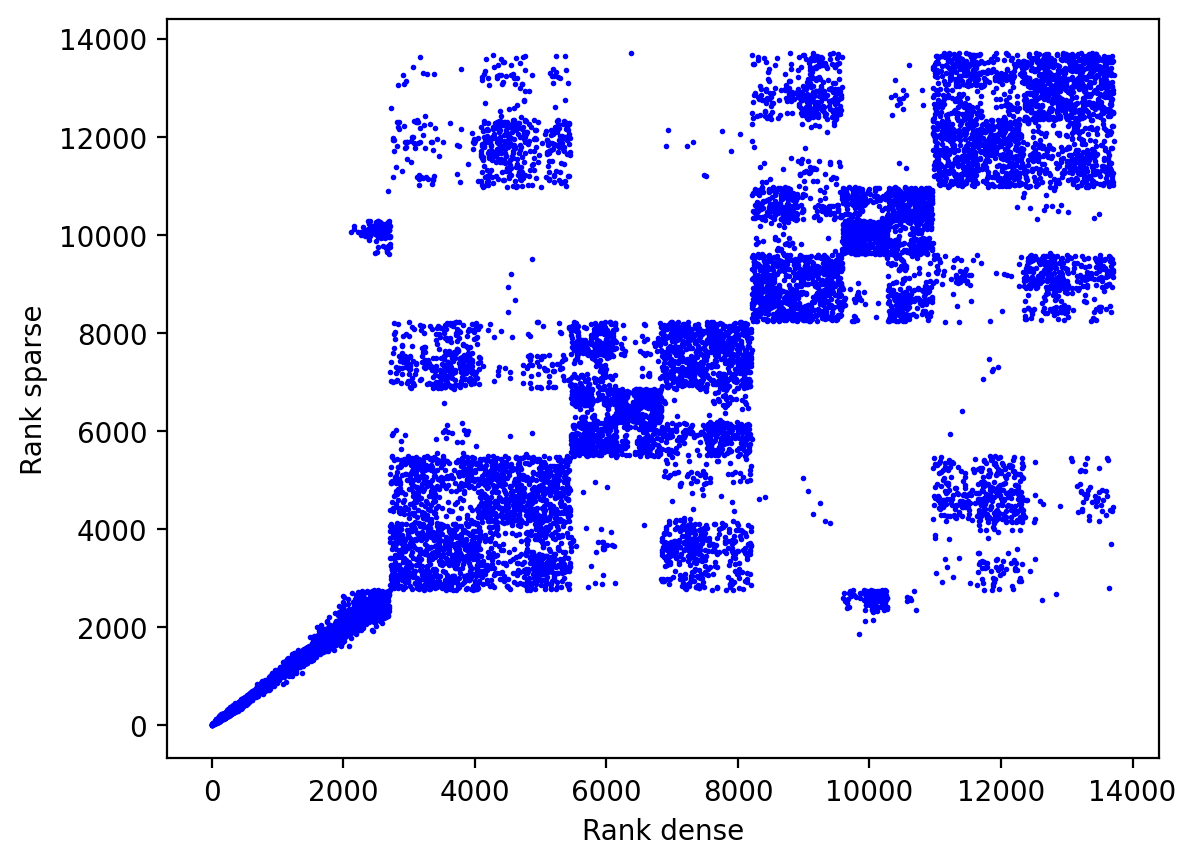

In [18]:
hs.plot_compare_ranks(res1, res2, sort_by="logpval_adj", xlabel="Rank dense", ylabel="Rank sparse")

In [19]:
np.random.seed(1)
res3=hs.haystack(adata_raw, basis="umap")

> starting haystack ...
> scaling coordinates ...
> converting to dense array ...
> calculating feature's stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|████████████████████████████████████████████████████| 13713/13713 [00:10<00:00, 1258.65it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.52it/s]


> calculating P values ...
> done.


In [20]:
np.random.seed(1)
res4=hs.haystack_sparse(exprs, coord)

> entering sparse method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|████████████████████████████████████████████████████| 13713/13713 [00:03<00:00, 4153.35it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 29.69it/s]


> calculating P values ...
> done.


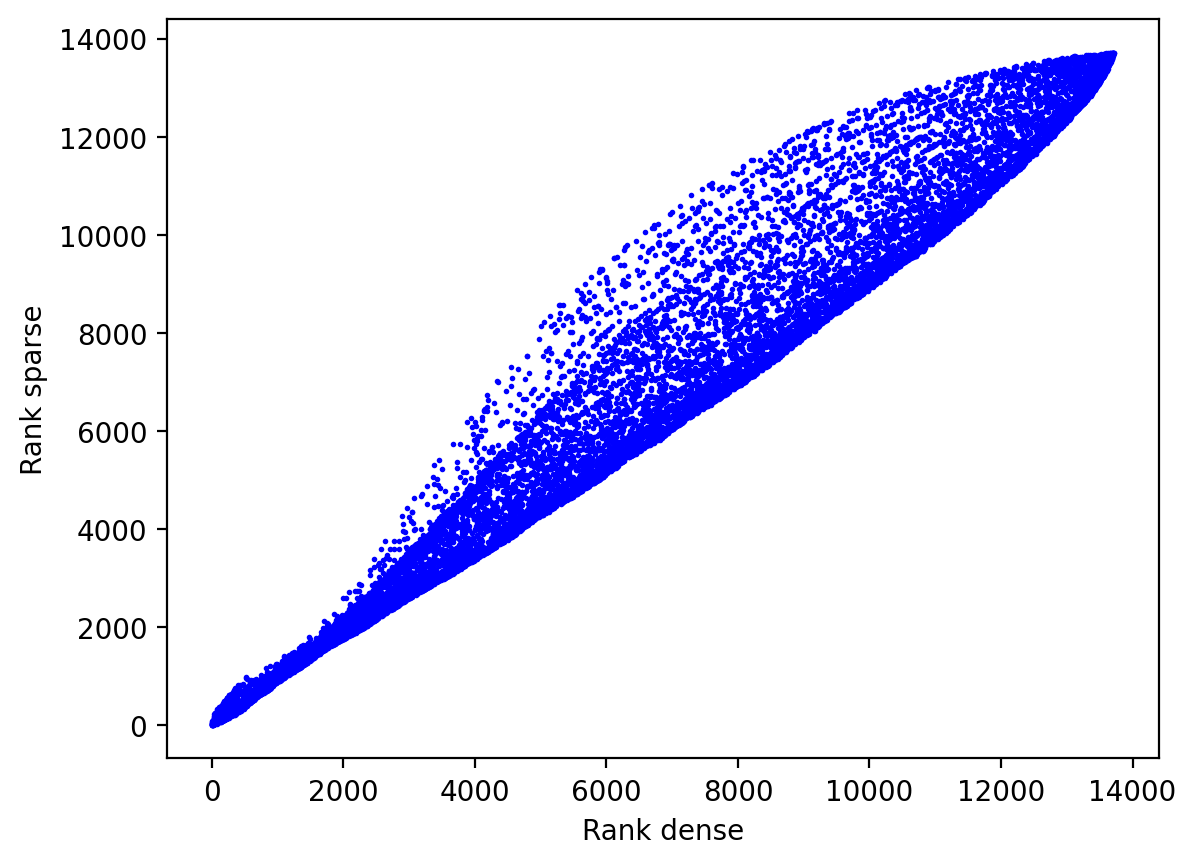

In [21]:
hs.plot_compare_ranks(res3, res4, "logpval", "Rank dense", "Rank sparse")

In [22]:
np.random.seed(1)
res5=hs.haystack_sparse(exprs, coord)

> entering sparse method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|████████████████████████████████████████████████████| 13713/13713 [00:02<00:00, 4993.75it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 30.61it/s]


> calculating P values ...
> done.


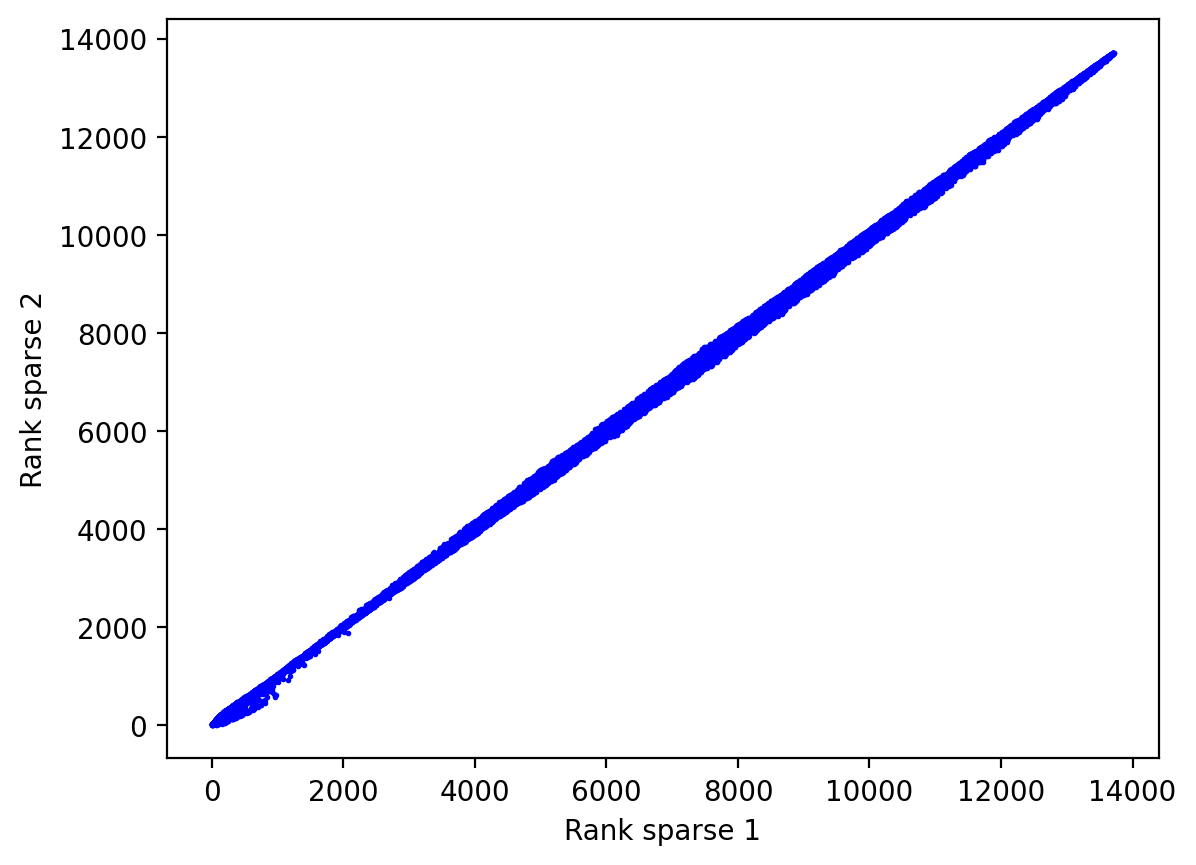

In [23]:
hs.plot_compare_ranks(res4, res5, "logpval", "Rank sparse 1", "Rank sparse 2")